## 第一期 Pandas基础

In [1]:
import pandas as pd
import numpy as np

### 1.将下面的字典创建为DataFrame

In [5]:
pd.DataFrame({'grammer':['Python','c','Java','Go','','SQL','PHP','Python']
              ,'score':['1','2','','4','5','6','7','10']})

,grammer,score
0,Python,1
1,c,2
2,Java,
3,Go,4
4,,5
5,SQL,6
6,PHP,7
7,Python,10


In [2]:
data = {"grammer":["Python","C","Java","GO",np.nan,"SQL","PHP","Python"],
       "score":[1,2,np.nan,4,5,6,7,10]}

In [3]:
df = pd.DataFrame(data)
df

,grammer,score
0,Python,1.0
1,C,2.0
2,Java,NaN
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


### 2.提取含有字符串"Python"的行

In [4]:
#方法一
df[df['grammer'] == 'Python']
#方法二
results = df['grammer'].str.contains("Python")
results.fillna(value=False,inplace = True)
df[results]

,grammer,score
0,Python,1.0
7,Python,10.0


### 3.输出df的所有列名

In [5]:
print(df.columns)

Index(['grammer', 'score'], dtype='object')


### 4.修改第二列列名为'popularity'

In [6]:
df.rename(columns={'score':'popularity'}, inplace = True)
df

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,NaN
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


### 5.统计grammer列中每种编程语言出现的次数

In [7]:
df['grammer'].value_counts()

Python    2
PHP       1
SQL       1
C         1
GO        1
Java      1
Name: grammer, dtype: int64

### 6.将空值用上下值的平均值填充

In [8]:
df['popularity'] = df['popularity'].fillna(df['popularity'].interpolate())
df

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,3.0
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


### 7.提取popularity列中值大于3的行

In [9]:
df[df['popularity'] > 3]

,grammer,popularity
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0
7,Python,10.0


### 8.按照grammer列进行去除重复值

In [10]:
df.drop_duplicates(['grammer'])

,grammer,popularity
0,Python,1.0
1,C,2.0
2,Java,3.0
3,GO,4.0
4,NaN,5.0
5,SQL,6.0
6,PHP,7.0


### 9.计算popularity列平均值

In [11]:
df['popularity'].mean()

4.75

### 10.将grammer列转换为list

In [12]:
df['grammer'].to_list()

['Python', 'C', 'Java', 'GO', nan, 'SQL', 'PHP', 'Python']

### 11.将DataFrame保存为EXCEL

In [13]:
df.to_excel('test.xlsx')

### 12.查看数据行列数

In [14]:
df.shape

(8, 2)

### 13.提取popularity列值大于3小于7的行

In [15]:
df[(df['popularity'] > 3) & (df['popularity'] < 7)]

,grammer,popularity
3,GO,4.0
4,NaN,5.0
5,SQL,6.0


### 14.交换两列位置

In [16]:
'''
方法1
'''
temp = df['popularity']
df.drop(labels=['popularity'], axis=1,inplace = True)
df.insert(0, 'popularity', temp)
df
'''
方法2
cols = df.columns[[1,0]]
df = df[cols]
df
'''

'\n方法2\ncols = df.columns[[1,0]]\ndf = df[cols]\ndf\n'

### 15.提取popularity列最大值所在行

In [17]:
df[df['popularity'] == df['popularity'].max()]

,popularity,grammer
7,10.0,Python


### 16.查看最后5行数据

In [18]:
df.tail()

,popularity,grammer
3,4.0,GO
4,5.0,NaN
5,6.0,SQL
6,7.0,PHP
7,10.0,Python


### 17.删除最后一行数据

In [19]:
df.drop([len(df)-1],inplace=True)
df

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Java
3,4.0,GO
4,5.0,NaN
5,6.0,SQL
6,7.0,PHP


### 18.添加一行数据['Perl',6.6] 

In [20]:
row={'grammer':'Perl','popularity':6.6}
df = df.append(row,ignore_index=True)
df

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Java
3,4.0,GO
4,5.0,NaN
5,6.0,SQL
6,7.0,PHP
7,6.6,Perl


### 19.对数据按照"popularity"列值的大小进行排序

In [21]:
df.sort_values("popularity",inplace=True)
df

,popularity,grammer
0,1.0,Python
1,2.0,C
2,3.0,Java
3,4.0,GO
4,5.0,NaN
5,6.0,SQL
7,6.6,Perl
6,7.0,PHP


### 20.统计grammer列每个字符串的长度

In [22]:
df['grammer'] = df['grammer'].fillna('R')
df['len_str'] = df['grammer'].map(lambda x: len(x))
df

,popularity,grammer,len_str
0,1.0,Python,6
1,2.0,C,1
2,3.0,Java,4
3,4.0,GO,2
4,5.0,R,1
5,6.0,SQL,3
7,6.6,Perl,4
6,7.0,PHP,3


## 第二期 Pandas数据处理

### 21.读取本地EXCEL数据

In [23]:
import pandas as pd
df = pd.read_excel('pandas120.xlsx')

### 22.查看df数据前5行

In [24]:
df.head()
df['min'] = df.salary.str.split('-',expand=True)[0].apply(lambda x:x.split('k')).apply(lambda x:int(x[0]))
df['max'] = df.salary.str.split('-',expand=True)[1].apply(lambda x:x.split('k')).apply(lambda x:int(x[0]))

df['mean'] =(df['min']+df['max'])/2

df

,createTime,education,salary,min,max,mean
0,2020-03-16 11:30:18,本科,20k-35k,20,35,27.5
1,2020-03-16 10:58:48,本科,20k-40k,20,40,30.0
2,2020-03-16 10:46:39,不限,20k-35k,20,35,27.5
3,2020-03-16 10:45:44,本科,13k-20k,13,20,16.5
4,2020-03-16 10:20:41,本科,10k-20k,10,20,15.0
...,...,...,...,...,...,...
130,2020-03-16 11:36:07,本科,10k-18k,10,18,14.0
131,2020-03-16 09:54:47,硕士,25k-50k,25,50,37.5
132,2020-03-16 10:48:32,本科,20k-40k,20,40,30.0
133,2020-03-16 10:46:31,本科,15k-23k,15,23,19.0


### 23.将salary列数据转换为最大值与最小值的平均值

In [27]:
#备注，在某些版本pandas中.ix方法可能失效，可使用.iloc，参考https://mp.weixin.qq.com/s/5xJ-VLaHCV9qX2AMNOLRtw
#为什么不能直接使用max，min函数，因为我们的数据中是20k-35k这种字符串，所以需要先用正则表达式提取数字
# import re
# # 方法一：apply + 自定义函数
# def func(df):
#     lst = df['salary'].split('-')
#     smin = int(lst[0].strip('k'))
#     smax = int(lst[1].strip('k'))
#     df['salary'] = int((smin + smax) / 2 * 1000)
#     return df

df = df.apply(func,axis=1)
# # 方法二：iterrows + 正则
# import re
# for index,row in df.iterrows():
#     nums = re.findall('\d+',row[2])
#     df.iloc[index,2] = int(eval(f'({nums[0]} + {nums[1]}) / 2 * 1000'))

AttributeError: 'int' object has no attribute 'split'

### 24.将数据根据学历进行分组并计算平均薪资

In [28]:
print(df.groupby('education').mean())

                 salary        min        max       mean
education                                               
不限         19600.000000  15.800000  23.400000  19.600000
大专         10000.000000   7.000000  13.000000  10.000000
本科         19361.344538  14.336134  24.386555  19.361345
硕士         20642.857143  14.714286  26.571429  20.642857


### 25.将createTime列时间转换为月-日

In [29]:
#备注，在某些版本pandas中.ix方法可能失效，可使用.iloc，参考https://mp.weixin.qq.com/s/5xJ-VLaHCV9qX2AMNOLRtw
for i in range(len(df)):
    df.ix[i,0] = df.ix[i,0].to_pydatetime().strftime("%m-%d")  
df.head()

AttributeError: 'DataFrame' object has no attribute 'ix'

### 26.查看索引、数据类型和内存信息

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   createTime  135 non-null    datetime64[ns]
 1   education   135 non-null    object        
 2   salary      135 non-null    int64         
 3   min         135 non-null    int64         
 4   max         135 non-null    int64         
 5   mean        135 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.5+ KB


### 27.查看数值型列的汇总统计

In [31]:
df.describe()

,salary,min,max,mean
count,135.000000,135.000000,135.000000,135.000000
mean,19159.259259,14.192593,24.125926,19.159259
std,8661.686922,6.544334,11.055781,8.661687
min,3500.000000,3.000000,4.000000,3.500000
25%,14000.000000,10.000000,18.000000,14.000000
50%,17500.000000,15.000000,20.000000,17.500000
75%,25000.000000,20.000000,30.000000,25.000000
max,45000.000000,30.000000,60.000000,45.000000


### 28.新增一列根据salary将数据分为三组

In [32]:
bins = [0,5000, 20000, 50000]
group_names = ['低', '中', '高']
df['categories'] = pd.cut(df['salary'], bins, labels=group_names)
df

,createTime,education,salary,min,max,mean,categories
0,2020-03-16 11:30:18,本科,27500,20,35,27.5,高
1,2020-03-16 10:58:48,本科,30000,20,40,30.0,高
2,2020-03-16 10:46:39,不限,27500,20,35,27.5,高
3,2020-03-16 10:45:44,本科,16500,13,20,16.5,中
4,2020-03-16 10:20:41,本科,15000,10,20,15.0,中
...,...,...,...,...,...,...,...
130,2020-03-16 11:36:07,本科,14000,10,18,14.0,中
131,2020-03-16 09:54:47,硕士,37500,25,50,37.5,高
132,2020-03-16 10:48:32,本科,30000,20,40,30.0,高
133,2020-03-16 10:46:31,本科,19000,15,23,19.0,中


### 29.按照salary列对数据降序排列

In [33]:
df.sort_values('salary', ascending=False)

,createTime,education,salary,min,max,mean,categories
53,2020-03-16 11:30:17,本科,45000,30,60,45.0,高
37,2020-03-16 11:04:00,本科,40000,30,50,40.0,高
101,2020-03-16 11:01:39,本科,37500,30,45,37.5,高
16,2020-03-16 10:36:57,本科,37500,25,50,37.5,高
131,2020-03-16 09:54:47,硕士,37500,25,50,37.5,高
...,...,...,...,...,...,...,...
123,2020-03-16 11:20:44,本科,4500,3,6,4.5,低
126,2020-03-16 11:12:04,本科,4000,3,5,4.0,低
110,2020-03-16 11:12:04,本科,4000,3,5,4.0,低
96,2020-03-16 10:44:23,不限,3500,3,4,3.5,低


### 30.取出第33行数据

In [34]:
df.loc[32]

createTime    2020-03-16 10:07:25
education                      硕士
salary                      22500
min                            15
max                            30
mean                         22.5
categories                      高
Name: 32, dtype: object

### 31.计算salary列的中位数

In [35]:
np.median(df['salary'])

17500.0

### 32.绘制薪资水平频率分布直方图

<AxesSubplot:ylabel='Frequency'>

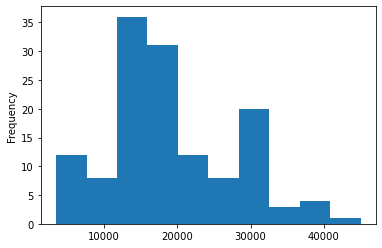

In [36]:
#执行两次
df.salary.plot(kind='hist')

### 33.绘制薪资水平密度曲线

<AxesSubplot:ylabel='Density'>

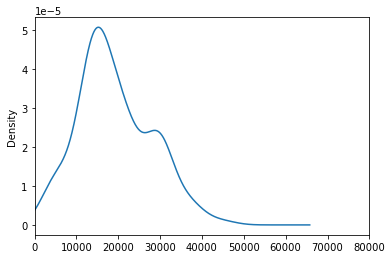

In [37]:
df.salary.plot(kind='kde',xlim=(0,80000))

### 34.删除最后一列categories

In [38]:
del df['categories']
# 等价于
df.drop(columns=['categories'], inplace=True)

KeyError: "['categories'] not found in axis"

### 35.将df的第一列与第二列合并为新的一列

In [39]:
df['test'] = df['education']+df['createTime']
df

/Users/yuanbo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimelike.py:1108: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  warnings.warn(


TypeError: unsupported operand type(s) for +: 'Timestamp' and 'str'

### 36.将education列与salary列合并为新的一列

In [40]:
#备注：salary为int类型，操作与35题有所不同
df["test1"] = df["salary"].map(str) + df['education']
df

,createTime,education,salary,min,max,mean,test1
0,2020-03-16 11:30:18,本科,27500,20,35,27.5,27500本科
1,2020-03-16 10:58:48,本科,30000,20,40,30.0,30000本科
2,2020-03-16 10:46:39,不限,27500,20,35,27.5,27500不限
3,2020-03-16 10:45:44,本科,16500,13,20,16.5,16500本科
4,2020-03-16 10:20:41,本科,15000,10,20,15.0,15000本科
...,...,...,...,...,...,...,...
130,2020-03-16 11:36:07,本科,14000,10,18,14.0,14000本科
131,2020-03-16 09:54:47,硕士,37500,25,50,37.5,37500硕士
132,2020-03-16 10:48:32,本科,30000,20,40,30.0,30000本科
133,2020-03-16 10:46:31,本科,19000,15,23,19.0,19000本科


### 37.计算salary最大值与最小值之差

In [41]:
df[['salary']].apply(lambda x: x.max() - x.min())

salary    41500
dtype: int64

### 38.将第一行与最后一行拼接

In [42]:
pd.concat([df[:1], df[-2:-1]])

,createTime,education,salary,min,max,mean,test1
0,2020-03-16 11:30:18,本科,27500,20,35,27.5,27500本科
133,2020-03-16 10:46:31,本科,19000,15,23,19.0,19000本科


### 39.将第8行数据添加至末尾

In [43]:
df.append(df.iloc[7])

,createTime,education,salary,min,max,mean,test1
0,2020-03-16 11:30:18,本科,27500,20,35,27.5,27500本科
1,2020-03-16 10:58:48,本科,30000,20,40,30.0,30000本科
2,2020-03-16 10:46:39,不限,27500,20,35,27.5,27500不限
3,2020-03-16 10:45:44,本科,16500,13,20,16.5,16500本科
4,2020-03-16 10:20:41,本科,15000,10,20,15.0,15000本科
...,...,...,...,...,...,...,...
131,2020-03-16 09:54:47,硕士,37500,25,50,37.5,37500硕士
132,2020-03-16 10:48:32,本科,30000,20,40,30.0,30000本科
133,2020-03-16 10:46:31,本科,19000,15,23,19.0,19000本科
134,2020-03-16 11:19:38,本科,30000,20,40,30.0,30000本科


### 40.查看每列的数据类型

In [44]:
df.dtypes

createTime    datetime64[ns]
education             object
salary                 int64
min                    int64
max                    int64
mean                 float64
test1                 object
dtype: object

### 41.将createTime列设置为索引

In [45]:
df.set_index("createTime")

,education,salary,min,max,mean,test1
createTime,,,,,,
2020-03-16 11:30:18,本科,27500,20,35,27.5,27500本科
2020-03-16 10:58:48,本科,30000,20,40,30.0,30000本科
2020-03-16 10:46:39,不限,27500,20,35,27.5,27500不限
2020-03-16 10:45:44,本科,16500,13,20,16.5,16500本科
2020-03-16 10:20:41,本科,15000,10,20,15.0,15000本科
...,...,...,...,...,...,...
2020-03-16 11:36:07,本科,14000,10,18,14.0,14000本科
2020-03-16 09:54:47,硕士,37500,25,50,37.5,37500硕士
2020-03-16 10:48:32,本科,30000,20,40,30.0,30000本科


### 42.生成一个和df长度相同的随机数dataframe

In [46]:
df1 = pd.DataFrame(pd.Series(np.random.randint(1, 10, 135)))
df1

,0
0,7
1,3
2,4
3,1
4,6
...,...
130,1
131,3
132,1
133,3


### 43.将上一题生成的dataframe与df合并

In [47]:
df= pd.concat([df,df1],axis=1)
df

,createTime,education,salary,min,max,mean,test1,0
0,2020-03-16 11:30:18,本科,27500,20,35,27.5,27500本科,7
1,2020-03-16 10:58:48,本科,30000,20,40,30.0,30000本科,3
2,2020-03-16 10:46:39,不限,27500,20,35,27.5,27500不限,4
3,2020-03-16 10:45:44,本科,16500,13,20,16.5,16500本科,1
4,2020-03-16 10:20:41,本科,15000,10,20,15.0,15000本科,6
...,...,...,...,...,...,...,...,...
130,2020-03-16 11:36:07,本科,14000,10,18,14.0,14000本科,1
131,2020-03-16 09:54:47,硕士,37500,25,50,37.5,37500硕士,3
132,2020-03-16 10:48:32,本科,30000,20,40,30.0,30000本科,1
133,2020-03-16 10:46:31,本科,19000,15,23,19.0,19000本科,3


### 44.生成新的一列new为salary列减去之前生成随机数列

In [48]:
df["new"] = df["salary"] - df[0]
df

,createTime,education,salary,min,max,mean,test1,0,new
0,2020-03-16 11:30:18,本科,27500,20,35,27.5,27500本科,7,27493
1,2020-03-16 10:58:48,本科,30000,20,40,30.0,30000本科,3,29997
2,2020-03-16 10:46:39,不限,27500,20,35,27.5,27500不限,4,27496
3,2020-03-16 10:45:44,本科,16500,13,20,16.5,16500本科,1,16499
4,2020-03-16 10:20:41,本科,15000,10,20,15.0,15000本科,6,14994
...,...,...,...,...,...,...,...,...,...
130,2020-03-16 11:36:07,本科,14000,10,18,14.0,14000本科,1,13999
131,2020-03-16 09:54:47,硕士,37500,25,50,37.5,37500硕士,3,37497
132,2020-03-16 10:48:32,本科,30000,20,40,30.0,30000本科,1,29999
133,2020-03-16 10:46:31,本科,19000,15,23,19.0,19000本科,3,18997


### 45.检查数据中是否含有任何缺失值

In [49]:
df.isnull().values.any()

False

### 46.将salary列类型转换为浮点数

In [50]:
df['salary'].astype(np.float64)

0      27500.0
1      30000.0
2      27500.0
3      16500.0
4      15000.0
        ...   
130    14000.0
131    37500.0
132    30000.0
133    19000.0
134    30000.0
Name: salary, Length: 135, dtype: float64

### 47.计算salary大于10000的次数

In [51]:
len(df[df['salary']>10000])

119

### 48.查看每种学历出现的次数

In [52]:
df.education.value_counts()

本科    119
硕士      7
不限      5
大专      4
Name: education, dtype: int64

### 49.查看education列共有几种学历

In [53]:
df['education'].nunique()

4

### 50.提取salary与new列的和大于60000的最后3行

In [54]:
df1 = df[['salary','new']]
rowsums = df1.apply(np.sum, axis=1)
res = df.iloc[np.where(rowsums > 60000)[0][-3:], :]
res

,createTime,education,salary,min,max,mean,test1,0,new
92,2020-03-16 10:41:20,本科,35000,30,40,35.0,35000本科,4,34996
101,2020-03-16 11:01:39,本科,37500,30,45,37.5,37500本科,6,37494
131,2020-03-16 09:54:47,硕士,37500,25,50,37.5,37500硕士,3,37497


## 第三期 金融数据处理

### 51.使用绝对路径读取本地Excel数据

In [55]:
#请将下面的路径替换为你存储数据的路径
data = pd.read_excel('/Users/Desktop/600000.SH.xls')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Desktop/600000.SH.xls'

### 52.查看数据前三行

In [ ]:
data.head(3)

### 53.查看每列数据缺失值情况

In [ ]:
data.isnull().sum()

### 54.提取日期列含有空值的行

In [ ]:
data[data['日期'].isnull()]

### 55.输出每列缺失值具体行数

In [ ]:
for columname in data.columns:
    if data[columname].count() != len(data):
        loc = data[columname][data[columname].isnull().values==True].index.tolist()
        print('列名："{}", 第{}行位置有缺失值'.format(columname,loc))

### 56.删除所有存在缺失值的行

In [ ]:
'''
备注
axis：0-行操作（默认），1-列操作
how：any-只要有空值就删除（默认），all-全部为空值才删除
inplace：False-返回新的数据集（默认），True-在原数据集上操作
'''
data.dropna(axis=0, how='any', inplace=True)

### 57.绘制收盘价的折线图

In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn-darkgrid') # 设置画图的风格
plt.rc('font',  size=6) #设置图中字体和大小
plt.rc('figure', figsize=(4,3), dpi=150) # 设置图的大小
data['收盘价(元)'].plot()

# 等价于
import matplotlib.pyplot as plt
plt.plot(df['收盘价(元)'])

### 58.同时绘制开盘价与收盘价

In [ ]:
data[['收盘价(元)','开盘价(元)']].plot()

### 59.绘制涨跌幅的直方图

In [ ]:
plt.hist(df['涨跌幅(%)'])
# 等价于
df['涨跌幅(%)'].hist()

### 60.让直方图更细致

In [ ]:
data['涨跌幅(%)'].hist(bins = 30)

### 61.以data的列名创建一个dataframe

In [ ]:
temp = pd.DataFrame(columns = data.columns.to_list())

### 62.打印所有换手率不是数字的行

In [ ]:
for i in range(len(data)):
    if type(data.iloc[i,13]) != float:
        temp = temp.append(data.loc[i])

temp

### 63.打印所有换手率为--的行

In [ ]:
data[data['换手率(%)'].isin(['--'])]

### 64.重置data的行号

In [ ]:
data = data.reset_index()

### 65.删除所有换手率为非数字的行

In [ ]:
k =[]
for i in range(len(data)):
    if type(data.iloc[i,13]) != float:
        k.append(i)
data.drop(labels=k,inplace=True)

### 66.绘制换手率的密度曲线

In [ ]:
data['换手率(%)'].plot(kind='kde')

### 67.计算前一天与后一天收盘价的差值

In [ ]:
data['收盘价(元)'].diff()

### 68.计算前一天与后一天收盘价变化率

In [ ]:
data['收盘价(元)'].pct_change()

### 69.设置日期为索引

In [ ]:
data = data.set_index('日期')

### 70.以5个数据作为一个数据滑动窗口，在这个5个数据上取均值(收盘价)

In [ ]:
data['收盘价(元)'].rolling(5).mean()

### 71.以5个数据作为一个数据滑动窗口，计算这五个数据总和(收盘价)

In [ ]:
data['收盘价(元)'].rolling(5).sum()

### 72.将收盘价5日均线、20日均线与原始数据绘制在同一个图上

In [ ]:
data['收盘价(元)'].plot()
data['收盘价(元)'].rolling(5).mean().plot()
data['收盘价(元)'].rolling(20).mean().plot()

### 73.按周为采样规则，取一周收盘价最大值

In [ ]:
data['收盘价(元)'].resample('W').max()

### 74.绘制重采样数据与原始数据

In [ ]:
data['收盘价(元)'].plot()
data['收盘价(元)'].resample('7D').max().plot()

### 75.将数据往后移动5天

In [ ]:
data.shift(5)

### 76.将数据向前移动5天

In [ ]:
data.shift(-5)

### 77.使用expending函数计算开盘价的移动窗口均值

In [ ]:
data['开盘价(元)'].expanding(min_periods=1).mean()

### 78.绘制上一题的移动均值与原始数据折线图

In [ ]:
data['expanding Open mean']=data['开盘价(元)'].expanding(min_periods=1).mean()
data[['开盘价(元)', 'expanding Open mean']].plot(figsize=(16, 6))

### 79.计算布林指标

In [ ]:
data['former 30 days rolling Close mean']=data['收盘价(元)'].rolling(20).mean()
data['upper bound']=data['former 30 days rolling Close mean']+2*data['收盘价(元)'].rolling(20).std()#在这里我们取20天内的标准差
data['lower bound']=data['former 30 days rolling Close mean']-2*data['收盘价(元)'].rolling(20).std()

### 80.计算布林线并绘制

In [ ]:
data[['收盘价(元)', 'former 30 days rolling Close mean','upper bound','lower bound' ]].plot(figsize=(16, 6))

## 第四期 当Pandas遇上NumPy

### 81.导入并查看pandas与numpy版本

In [ ]:
import pandas as pd
import numpy as np
print(np.__version__)
print(pd.__version__)

### 82.从NumPy数组创建DataFrame

In [ ]:
#备注 使用numpy生成20个0-100随机数
tem = np.random.randint(1,100,20)
df1 = pd.DataFrame(tem)
df1

### 83.从NumPy数组创建DataFrame

In [ ]:
#备注 使用numpy生成20个0-100固定步长的数
tem = np.arange(0,100,5)
df2 = pd.DataFrame(tem)
df2

### 84.从NumPy数组创建DataFrame

In [ ]:
#备注 使用numpy生成20个指定分布(如标准正态分布)的数
tem = np.random.normal(0, 1, 20)
df3 = pd.DataFrame(tem)
df3

### 85.将df1，df2，df3按照行合并为新DataFrame

In [ ]:
df = pd.concat([df1,df2,df3],axis=0,ignore_index=True)
df

### 86.将df1，df2，df3按照列合并为新DataFrame

In [ ]:
df = pd.concat([df1,df2,df3],axis=1,ignore_index=True)
df

### 87.查看df所有数据的最小值、25%分位数、中位数、75%分位数、最大值

In [ ]:
print(np.percentile(df, q=[0, 25, 50, 75, 100]))

### 88.修改列名为col1,col2,col3

In [ ]:
df.columns = ['col1','col2','col3']

### 89.提取第一列中不在第二列出现的数字

In [ ]:
df['col1'][~df['col1'].isin(df['col2'])]

### 90.提取第一列和第二列出现频率最高的三个数字

In [ ]:
temp = df['col1'].append(df['col2'])
temp.value_counts().index[:3]

### 91.提取第一列中可以整除5的数字位置

In [ ]:
np.argwhere(df['col1'] % 5==0)

### 92.计算第一列数字前一个与后一个的差值

In [ ]:
df['col1'].diff().tolist()

### 93.将col1,col2,clo3三列顺序颠倒

In [ ]:
df.ix[:, ::-1]

### 94.提取第一列位置在1,10,15的数字

In [ ]:
df['col1'].take([1,10,15])
# 等价于
df.iloc[[1,10,15],0]

### 95.查找第一列的局部最大值位置

In [ ]:
#备注 即比它前一个与后一个数字的都大的数字
tem = np.diff(np.sign(np.diff(df['col1'])))
np.where(tem == -2)[0] + 1

### 96.按行计算df的每一行均值

In [ ]:
df[['col1','col2','col3']].mean(axis=1)

### 97.对第二列计算移动平均值

In [ ]:
#备注 每次移动三个位置，不可以使用自定义函数

np.convolve(df['col2'], np.ones(3)/3, mode='valid')

### 98.将数据按照第三列值的大小升序排列

In [ ]:
df.sort_values("col3",inplace=True)

### 99.将第一列大于50的数字修改为'高'

In [ ]:
df.col1[df['col1'] > 50]= '高'

### 100.计算第二列与第三列之间的欧式距离

In [ ]:
np.linalg.norm(df['col2']-df['col3'])

## 第五期 一些补充

### 101.从CSV文件中读取指定数据

In [ ]:
#备注 从数据1中的前10行中读取positionName, salary两列

df = pd.read_csv('数据1.csv',encoding='gbk', usecols=['positionName', 'salary'],nrows = 10)
df

### 102.从CSV文件中读取指定数据

In [ ]:
#备注 从数据2中读取数据并在读取数据时将薪资大于10000的为改为高

df = pd.read_csv('数据2.csv',converters={'薪资水平': lambda x: '高' if float(x) > 10000 else '低'} )
df

### 103.从上一题数据中，对薪资水平列每隔20行进行一次抽样

In [ ]:
df.iloc[::20, :][['薪资水平']]

### 104.将数据取消使用科学计数法

In [ ]:
#输入
df = pd.DataFrame(np.random.random(10)**10, columns=['data'])
df

In [ ]:
df.round(3)

### 105.将上一题的数据转换为百分数

In [ ]:
df.style.format({'data': '{0:.2%}'.format})

### 106.查找上一题数据中第3大值的行号

In [ ]:
df['data'].argsort()[::-1][7]

### 107.反转df的行

In [ ]:
df.iloc[::-1, :]

### 108.按照多列对数据进行合并

In [ ]:
#输入
df1= pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
'key2': ['K0', 'K1', 'K0', 'K1'],
'A': ['A0', 'A1', 'A2', 'A3'],
'B': ['B0', 'B1', 'B2', 'B3']})

df2= pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
'key2': ['K0', 'K0', 'K0', 'K0'],
'C': ['C0', 'C1', 'C2', 'C3'],
'D': ['D0', 'D1', 'D2', 'D3']})

In [ ]:
pd.merge(df1, df2, on=['key1', 'key2'])

### 109.按照多列对数据进行合并

In [ ]:
pd.merge(df1, df2, how='left', on=['key1', 'key2'])

### 110.再次读取数据1并显示所有的列

In [ ]:
df = pd.read_csv('数据1.csv',encoding='gbk')
pd.set_option("display.max.columns", None)
df

### 111.查找secondType与thirdType值相等的行号

In [ ]:
np.where(df.secondType == df.thirdType)

### 112.查找薪资大于平均薪资的第三个数据

In [ ]:
np.argwhere(df['salary'] > df['salary'].mean())[2]

### 113.将上一题数据的salary列开根号

In [ ]:
df[['salary']].apply(np.sqrt)

### 114.将上一题数据的linestaion列按_拆分

In [ ]:
df['split'] = df['linestaion'].str.split('_')

### 115.查看上一题数据中一共有多少列

In [ ]:
df.shape[1]

### 116.提取industryField列以'数据'开头的行

In [ ]:
df[df['industryField'].str.startswith('数据')]

### 117.按列制作数据透视表

In [ ]:
pd.pivot_table(df,values=["salary","score"],index="positionId")

### 118.同时对salary、score两列进行计算

In [ ]:
df[["salary","score"]].agg([np.sum,np.mean,np.min])

### 119.对salary求平均，对score列求和

In [ ]:
df.agg({"salary":np.sum,"score":np.mean})

### 120.计算并提取平均薪资最高的区

In [ ]:
df[['district','salary']].groupby(by='district').mean().sort_values('salary',ascending=False).head(1)